In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [70]:
import os
print(os.getcwd())
os.chdir('/Users/dineshchandgeetharavichandran/Desktop/Dinesh/Project/Data-Science/Machine Learning Programs/KNN') 

/Users/dineshchandgeetharavichandran/Desktop/Dinesh/Project/Data-Science/Machine Learning Programs/KNN


In [71]:
df = pd.read_csv("Classified Data",index_col=0)


In [72]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()

In [75]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [76]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [77]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn = KNeighborsClassifier(n_neighbors=1)

In [82]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [83]:
pred = knn.predict(X_test)

In [84]:
from sklearn.metrics import classification_report,confusion_matrix

In [85]:
print(confusion_matrix(y_test,pred))

[[135  16]
 [  9 140]]


In [86]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       151
           1       0.90      0.94      0.92       149

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [87]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

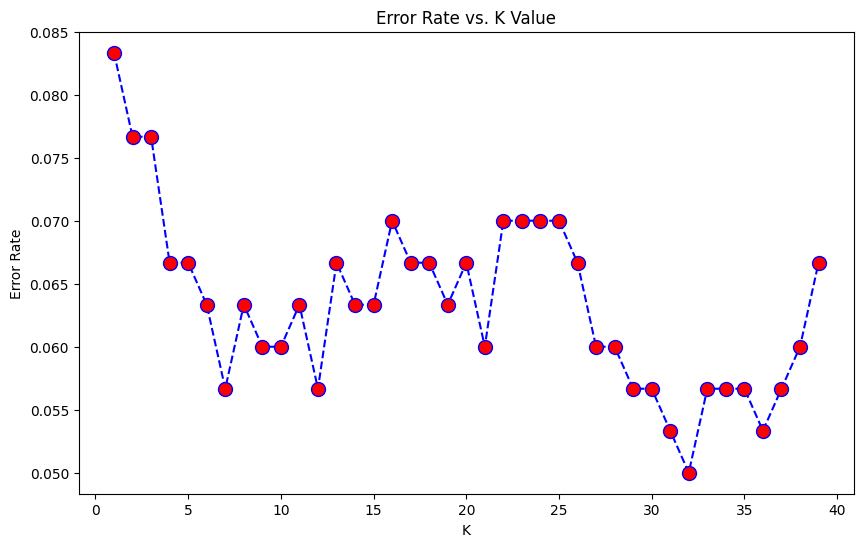

In [88]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [89]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[135  16]
 [  9 140]]


              precision    recall  f1-score   support

           0       0.94      0.89      0.92       151
           1       0.90      0.94      0.92       149

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [90]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[137  14]
 [  7 142]]


              precision    recall  f1-score   support

           0       0.95      0.91      0.93       151
           1       0.91      0.95      0.93       149

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [91]:
# NOW WITH K=17
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=17')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=17


[[138  13]
 [  7 142]]


              precision    recall  f1-score   support

           0       0.95      0.91      0.93       151
           1       0.92      0.95      0.93       149

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [92]:
# NOW WITH K=19
knn = KNeighborsClassifier(n_neighbors=19)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=19')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=19


[[139  12]
 [  7 142]]


              precision    recall  f1-score   support

           0       0.95      0.92      0.94       151
           1       0.92      0.95      0.94       149

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



<B>Wrong prediction with Original Data</B>
Expected Value is 1

In [93]:
data1 = [0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409]
df1 = pd.DataFrame([data1], columns=["WTT","PTI","EQW","SBI","LQE","QWG","FDJ","PJF","HQE","NXJ"])
knn.predict(df1)

/usr/local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([0])

<B>Correct prediction with Scaled Data</B>
Expected Value is 1

In [94]:
# Your input data for prediction
data1 = [0.913917, 1.162073, 0.567946, 0.755464, 0.780862, 0.352608, 0.759697, 0.643798, 0.879422, 1.231409]

# Create a DataFrame for the input data
df1 = pd.DataFrame([data1], columns=["WTT", "PTI", "EQW", "SBI", "LQE", "QWG", "FDJ", "PJF", "HQE", "NXJ"])

# Assume you already trained a KNN model (`knn`) and scaled your training data with `scaler`
scaler = StandardScaler()

# Fit the scaler to the training data (this step is done during model training)
# Note: Use the same scaler fitted on the training data
scaler.fit(df1)

# Transform the input data using the already-fitted scaler
scaled_features = scaler.transform(df1)

# Create a scaled DataFrame for visualization (optional)
df_feat = pd.DataFrame(scaled_features, columns=df1.columns)

# Make predictions using the scaled data
predictions = knn.predict(scaled_features)

# Output predictions
print(predictions)

[1]
